In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
from scipy import stats
import seaborn as sns

In [2]:
data = pd.read_csv("continuous dataset.csv")
data.head()

,datetime,nat_demand,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,T2M_dav,QV2M_dav,TQL_dav,W2M_dav,Holiday_ID,holiday,school
0,2015-01-03 01:00:00,970.3450,25.865259,0.018576,0.016174,21.850546,23.482446,0.017272,0.001855,10.328949,22.662134,0.016562,0.096100,5.364148,0,0,0
1,2015-01-03 02:00:00,912.1755,25.899255,0.018653,0.016418,22.166944,23.399255,0.017265,0.001327,10.681517,22.578943,0.016509,0.087646,5.572471,0,0,0
2,2015-01-03 03:00:00,900.2688,25.937280,0.018768,0.015480,22.454911,23.343530,0.017211,0.001428,10.874924,22.531030,0.016479,0.078735,5.871184,0,0,0
3,2015-01-03 04:00:00,889.9538,25.957544,0.018890,0.016273,22.110481,23.238794,0.017128,0.002599,10.518620,22.512231,0.016487,0.068390,5.883621,0,0,0
4,2015-01-03 05:00:00,893.6865,25.973840,0.018981,0.017281,21.186089,23.075403,0.017059,0.001729,9.733589,22.481653,0.016456,0.064362,5.611724,0,0,0


In [3]:
data.shape

(48048, 17)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48048 entries, 0 to 48047
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    48048 non-null  object 
 1   nat_demand  48048 non-null  float64
 2   T2M_toc     48048 non-null  float64
 3   QV2M_toc    48048 non-null  float64
 4   TQL_toc     48048 non-null  float64
 5   W2M_toc     48048 non-null  float64
 6   T2M_san     48048 non-null  float64
 7   QV2M_san    48048 non-null  float64
 8   TQL_san     48048 non-null  float64
 9   W2M_san     48048 non-null  float64
 10  T2M_dav     48048 non-null  float64
 11  QV2M_dav    48048 non-null  float64
 12  TQL_dav     48048 non-null  float64
 13  W2M_dav     48048 non-null  float64
 14  Holiday_ID  48048 non-null  int64  
 15  holiday     48048 non-null  int64  
 16  school      48048 non-null  int64  
dtypes: float64(13), int64(3), object(1)
memory usage: 6.2+ MB


In [5]:
data.isnull().sum()

datetime      0
nat_demand    0
T2M_toc       0
QV2M_toc      0
TQL_toc       0
W2M_toc       0
T2M_san       0
QV2M_san      0
TQL_san       0
W2M_san       0
T2M_dav       0
QV2M_dav      0
TQL_dav       0
W2M_dav       0
Holiday_ID    0
holiday       0
school        0
dtype: int64

In [6]:
data.describe()

,nat_demand,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,T2M_dav,QV2M_dav,TQL_dav,W2M_dav,Holiday_ID,holiday,school
count,48048.000000,48048.000000,48048.000000,48048.000000,48048.000000,48048.000000,48048.000000,48048.000000,48048.000000,48048.000000,48048.000000,48048.000000,48048.000000,48048.000000,48048.000000,48048.000000
mean,1182.868647,27.399111,0.018313,0.079979,13.391049,26.921023,0.017844,0.106265,7.046675,24.719513,0.016867,0.144681,3.567589,0.704795,0.062937,0.727793
std,192.068896,1.675462,0.001607,0.065589,7.295502,3.018129,0.001889,0.086293,4.103711,2.414019,0.001584,0.087899,1.710522,3.147470,0.242852,0.445100
min,85.192500,22.953455,0.012054,0.000000,0.008979,19.765222,0.010247,0.000009,0.060394,19.933740,0.009655,0.000032,0.015497,0.000000,0.000000,0.000000
25%,1020.056900,26.160455,0.017236,0.026451,7.544958,24.769281,0.016584,0.036819,3.955051,22.954652,0.015800,0.075775,2.298887,0.000000,0.000000,0.000000
50%,1168.427700,27.118051,0.018590,0.065201,12.182103,26.167352,0.018351,0.085968,5.992762,24.001718,0.017167,0.130188,3.413994,0.000000,0.000000,1.000000
75%,1327.563950,28.558344,0.019521,0.117310,18.661282,28.712335,0.019242,0.157288,9.409871,26.243402,0.018067,0.200012,4.670628,0.000000,0.000000,1.000000
max,1754.882000,35.039575,0.022690,0.521240,39.229726,39.063440,0.022165,0.484985,24.483937,34.216211,0.021066,0.477783,10.288902,22.000000,1.000000,1.000000


In [7]:
data.drop(data.index[48047],inplace = True)

In [8]:
def date(x):
    x = str(x)
    return(x[:10])

data["datetime"] = data["datetime"].apply(date)

data.head()

,datetime,nat_demand,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,T2M_dav,QV2M_dav,TQL_dav,W2M_dav,Holiday_ID,holiday,school
0,2015-01-03,970.3450,25.865259,0.018576,0.016174,21.850546,23.482446,0.017272,0.001855,10.328949,22.662134,0.016562,0.096100,5.364148,0,0,0
1,2015-01-03,912.1755,25.899255,0.018653,0.016418,22.166944,23.399255,0.017265,0.001327,10.681517,22.578943,0.016509,0.087646,5.572471,0,0,0
2,2015-01-03,900.2688,25.937280,0.018768,0.015480,22.454911,23.343530,0.017211,0.001428,10.874924,22.531030,0.016479,0.078735,5.871184,0,0,0
3,2015-01-03,889.9538,25.957544,0.018890,0.016273,22.110481,23.238794,0.017128,0.002599,10.518620,22.512231,0.016487,0.068390,5.883621,0,0,0
4,2015-01-03,893.6865,25.973840,0.018981,0.017281,21.186089,23.075403,0.017059,0.001729,9.733589,22.481653,0.016456,0.064362,5.611724,0,0,0


In [9]:
daily_data = pd.DataFrame (columns=["date","nat_demand","T2M_toc","QV2M_toc","TQL_toc","W2M_toc","T2M_san","QV2M_san",
                                      "TQL_san","W2M_san","T2M_dav","QV2M_dav","TQL_dav","W2M_dav","holiday","school"])
elect = data.groupby(["datetime"])

for name,group in elect:
    new_row = {"date" : name,"nat_demand":sum(group["nat_demand"]),"T2M_toc":np.mean(group["T2M_toc"]),
                  "QV2M_toc":np.mean(group["QV2M_toc"]),"TQL_toc":np.mean(group["TQL_toc"]),"W2M_toc":np.mean(group["W2M_toc"]),
                  "T2M_san":np.mean(group["T2M_san"]),"QV2M_san":np.mean(group["QV2M_san"]),"TQL_san":np.mean(group["TQL_san"]),
                   "W2M_san":np.mean(group["W2M_san"]),"T2M_dav":np.mean(group["T2M_dav"]),"QV2M_dav":np.mean(group["QV2M_dav"]),
                   "TQL_dav":np.mean(group["TQL_dav"]),"W2M_dav":np.mean(group["W2M_dav"]),"holiday":np.mean(group["holiday"]),
                  "school":np.mean(group["school"])}
    daily_data = daily_data.append(new_row,ignore_index=True)
    

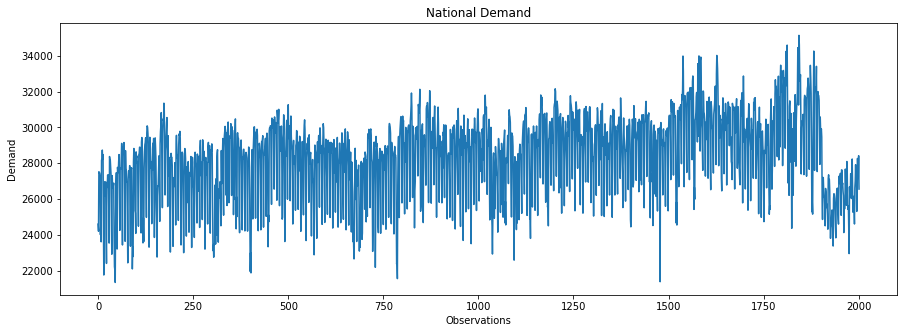

In [10]:
plt.figure(figsize = (15,5))
daily_data["nat_demand"].plot()

plt.xlabel("Observations")
plt.ylabel("Demand")
plt.title("National Demand")
plt.show()

In [11]:
#Splitting the date column in date, month and year

def day(x):
    return(x[8:])

def month(x):
    return(x[5:7])

def year(x):
    return(x[0:4])

daily_data["day"] =  daily_data["date"].apply(day)
daily_data["month"] =  daily_data["date"].apply(month)
daily_data["year"] =  daily_data["date"].apply(year)


In [12]:
daily_data.head()

,date,nat_demand,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,T2M_dav,QV2M_dav,TQL_dav,W2M_dav,holiday,school,day,month,year
0,2015-01-03,24593.1315,27.837319,0.018599,0.006561,22.589990,26.481001,0.018191,0.010949,11.127839,24.812523,0.017021,0.089999,4.377435,0.0,0.0,03,01,2015
1,2015-01-04,24194.9663,27.385723,0.017987,0.003788,23.531261,26.250307,0.017811,0.013746,12.090789,24.195294,0.016846,0.104575,4.964404,0.0,0.0,04,01,2015
2,2015-01-05,27520.3902,27.174477,0.017905,0.013344,26.775680,26.022784,0.017341,0.016091,14.204462,24.078774,0.016196,0.098414,7.180470,0.0,0.0,05,01,2015
3,2015-01-06,27441.4663,27.003596,0.017390,0.010847,26.491710,25.909521,0.017176,0.015202,13.804753,23.811539,0.016012,0.096998,6.958897,0.0,0.0,06,01,2015
4,2015-01-07,27458.3716,26.678420,0.017242,0.017465,23.896604,25.205438,0.016665,0.025092,13.041186,23.243199,0.015415,0.104125,6.984514,0.0,0.0,07,01,2015


### PLOTTING RANDOM MONTHS TO CHECK FOR EXISTENCE OF ANY PATTERN WITHIN A MONTH

Text(0.5, 1.0, '02/2020')

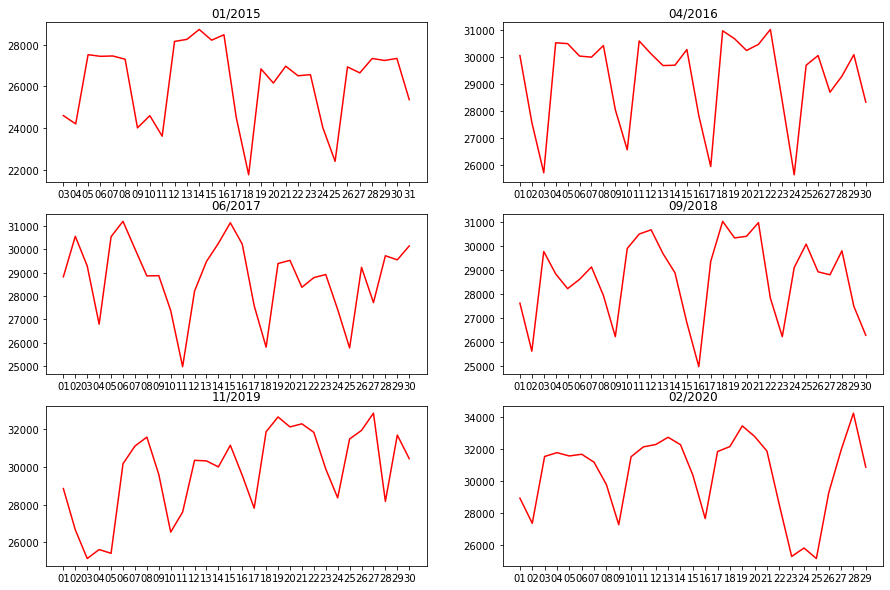

In [13]:
figure = plt.figure(figsize=(15,10))
plt.subplot(3,2,1)
plt.plot(daily_data["day"][daily_data["year"]=="2015"][daily_data["month"] == "01"], 
            daily_data["nat_demand"][daily_data["year"]=="2015"][daily_data["month"] == "01"],color="red")

plt.title("01/2015")

plt.subplot(3,2,2)
plt.plot(daily_data["day"][daily_data["year"]=="2016"][daily_data["month"] == "04"], 
            daily_data["nat_demand"][daily_data["year"]=="2016" ][daily_data["month"] == "04"],color="red")

plt.title("04/2016")


plt.subplot(3,2,3)
plt.plot(daily_data["day"][daily_data["year"]=="2017"][daily_data["month"] == "06"], 
            daily_data["nat_demand"][daily_data["year"]=="2017"][daily_data["month"] == "06"],color="red")
plt.title("06/2017")

plt.subplot(3,2,4)
plt.plot(daily_data["day"][daily_data["year"]=="2018"][daily_data["month"] == "09"], 
            daily_data["nat_demand"][daily_data["year"]=="2018" ][daily_data["month"] == "09"],color="red")
plt.title("09/2018")

plt.subplot(3,2,5)
plt.plot(daily_data["day"][daily_data["year"]=="2019"][daily_data["month"] == "11"], 
            daily_data["nat_demand"][daily_data["year"]=="2019" ][daily_data["month"] == "11"],color="red")
plt.title("11/2019")

plt.subplot(3,2,6)
plt.plot(daily_data["day"][daily_data["year"]=="2020"][daily_data["month"] == "02"], 
            daily_data["nat_demand"][daily_data["year"]=="2020" ][daily_data["month"] == "02"],color="red")
plt.title("02/2020")



### PLOTTING DEMAND BASED ON WEEDAYS TO CHECK FOR ANY PATTTERN

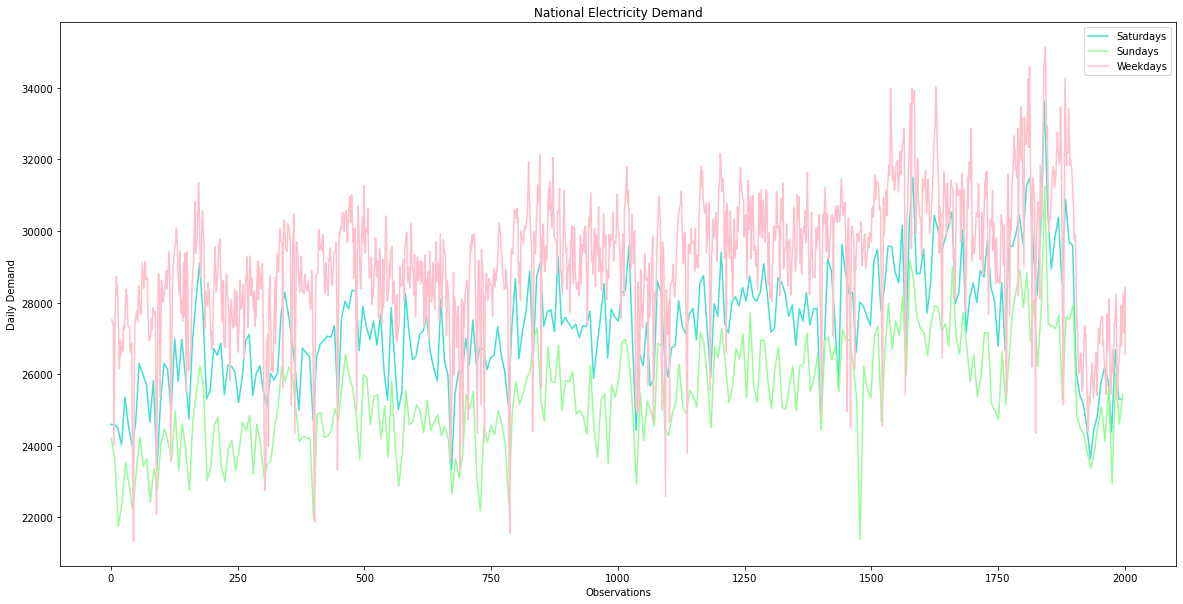

In [14]:
saturdays = list()
for i in range(0,daily_data.index.stop,7):
    saturdays.append(i)
    
#daily_data.loc[saturdays,"holiday"] = 1

sundays = list()
for i in range(1,daily_data.index.stop,7):
    sundays.append(i)
    
#daily_data.loc[sundays,"holiday"] = 1

weekdays = list()
for i in range(0,daily_data.index.stop):
    if i not in saturdays and i not in sundays:
        weekdays.append(i)
    else:
        continue



figure = plt.figure(figsize=(20,10))
daily_data.loc[saturdays,"nat_demand"].plot(color="turquoise")
daily_data.loc[sundays,"nat_demand"].plot(color="palegreen")
daily_data.loc[weekdays,"nat_demand"].plot(color="pink")
plt.xlabel("Observations")
plt.ylabel("Daily Demand")
plt.legend(["Saturdays","Sundays","Weekdays"])
plt.title("National Electricity Demand")

plt.show()

In [15]:
Sunday = [1 if j in sundays else 0 for j in range (0,daily_data.index.stop)]
Saturday = [1 if j in saturdays else 0 for j in range (0,daily_data.index.stop)]
Weekday = [1 if j in weekdays else 0 for j in range (0,daily_data.index.stop)]

daily_data["Sunday"] = Sunday
daily_data["Saturday"] = Saturday
daily_data["Weekday"] = Weekday

daily_data.head()


,date,nat_demand,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,...,TQL_dav,W2M_dav,holiday,school,day,month,year,Sunday,Saturday,Weekday
0,2015-01-03,24593.1315,27.837319,0.018599,0.006561,22.589990,26.481001,0.018191,0.010949,11.127839,...,0.089999,4.377435,0.0,0.0,03,01,2015,0,1,0
1,2015-01-04,24194.9663,27.385723,0.017987,0.003788,23.531261,26.250307,0.017811,0.013746,12.090789,...,0.104575,4.964404,0.0,0.0,04,01,2015,1,0,0
2,2015-01-05,27520.3902,27.174477,0.017905,0.013344,26.775680,26.022784,0.017341,0.016091,14.204462,...,0.098414,7.180470,0.0,0.0,05,01,2015,0,0,1
3,2015-01-06,27441.4663,27.003596,0.017390,0.010847,26.491710,25.909521,0.017176,0.015202,13.804753,...,0.096998,6.958897,0.0,0.0,06,01,2015,0,0,1
4,2015-01-07,27458.3716,26.678420,0.017242,0.017465,23.896604,25.205438,0.016665,0.025092,13.041186,...,0.104125,6.984514,0.0,0.0,07,01,2015,0,0,1


### PLOTTING FEW YEARS TO CHECK FOR EXISTENCE OF PATTERNS AMONG MONTHS 

Text(0.5, 1.0, '2018')

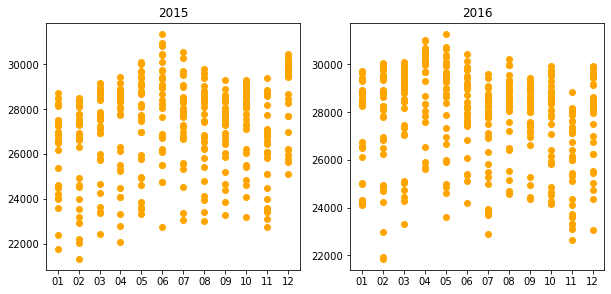

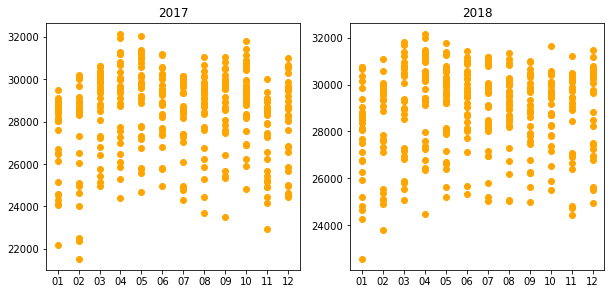

In [16]:
figure = plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.scatter(daily_data["month"][daily_data["year"]=="2015"], daily_data["nat_demand"][daily_data["year"]=="2015"],color="orange")
plt.title("2015")

plt.subplot(2,2,2)
plt.scatter(daily_data["month"][daily_data["year"]=="2016"], daily_data["nat_demand"][daily_data["year"]=="2016"],color="orange")
plt.title("2016")

figure = plt.figure(figsize=(10,10))
plt.subplot(2,2,3)
plt.scatter(daily_data["month"][daily_data["year"]=="2017"], daily_data["nat_demand"][daily_data["year"]=="2017"],color="orange")
plt.title("2017")

plt.subplot(2,2,4)
plt.scatter(daily_data["month"][daily_data["year"]=="2018"], daily_data["nat_demand"][daily_data["year"]=="2018"],color="orange")
plt.title("2018")


In [17]:
q1 = ["01","02","03"]
q2 = ["04","05","06"]
q3 = ["07","08","09"]
q4 = ["10","11","12"]
quarters = []

for i in range(0,daily_data.index.stop):
    if daily_data.loc[i,"month"] in q1:
        quarters.append("Q1")
    elif daily_data.loc[i,"month"] in q2:
        quarters.append("Q2")
    elif daily_data.loc[i,"month"] in q3:
        quarters.append("Q3")
    elif daily_data.loc[i,"month"] in q4:
        quarters.append("Q4")

daily_data["quarter"] = quarters

daily_data.head()

,date,nat_demand,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,...,W2M_dav,holiday,school,day,month,year,Sunday,Saturday,Weekday,quarter
0,2015-01-03,24593.1315,27.837319,0.018599,0.006561,22.589990,26.481001,0.018191,0.010949,11.127839,...,4.377435,0.0,0.0,03,01,2015,0,1,0,Q1
1,2015-01-04,24194.9663,27.385723,0.017987,0.003788,23.531261,26.250307,0.017811,0.013746,12.090789,...,4.964404,0.0,0.0,04,01,2015,1,0,0,Q1
2,2015-01-05,27520.3902,27.174477,0.017905,0.013344,26.775680,26.022784,0.017341,0.016091,14.204462,...,7.180470,0.0,0.0,05,01,2015,0,0,1,Q1
3,2015-01-06,27441.4663,27.003596,0.017390,0.010847,26.491710,25.909521,0.017176,0.015202,13.804753,...,6.958897,0.0,0.0,06,01,2015,0,0,1,Q1
4,2015-01-07,27458.3716,26.678420,0.017242,0.017465,23.896604,25.205438,0.016665,0.025092,13.041186,...,6.984514,0.0,0.0,07,01,2015,0,0,1,Q1


### PLOTTING AVERAGE YEARLY DEMAND TO LOOK FOR ANY TRENDS

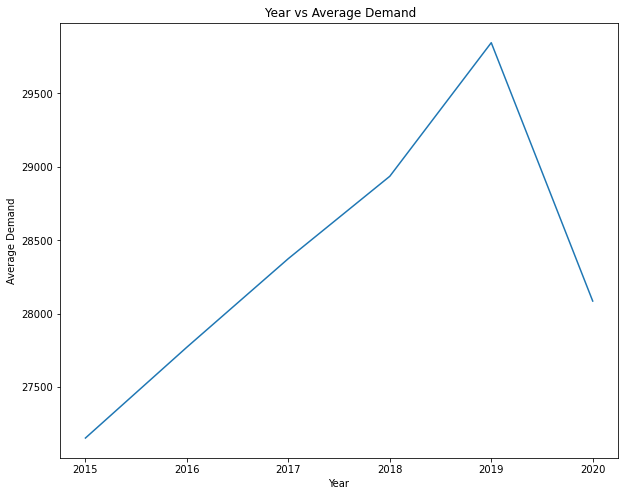

In [18]:
yearly_data = pd.DataFrame(columns=["year","nat_demand"])

yearly_group = daily_data.groupby(["year"])
for name, group in yearly_group:
    row = {"year":name , "nat_demand":np.mean(group["nat_demand"])}
    yearly_data = yearly_data.append(row, ignore_index = True)
    


figure = plt.figure(figsize=(10,8))
plt.plot(yearly_data["year"], yearly_data["nat_demand"])

plt.xlabel("Year")
plt.ylabel("Average Demand")
plt.title(" Year vs Average Demand")

plt.show()

In [19]:
#Lockdown in Panama was imposed on 22 March 2020

lock = [] 

for i in range (0,daily_data.index.stop):
    if daily_data.loc[i,"year"] == "2020" and int(daily_data.loc[i,"month"]) > 3:
        lock.append(1)
    elif int(daily_data.loc[i,"month"]) == 3 and int(daily_data.loc[i,"day"]) > 21:
        lock.append(1)
    else:
        lock.append(0)
        
daily_data["Lockdown"] = lock

daily_data.tail()

,date,nat_demand,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,...,holiday,school,day,month,year,Sunday,Saturday,Weekday,quarter,Lockdown
1997,2020-06-22,28265.8897,28.117811,0.020157,0.090935,6.498524,27.240207,0.019119,0.078524,4.030592,...,0.0,1.0,22,06,2020,0,0,1,Q2,1
1998,2020-06-23,27296.7922,28.212134,0.020796,0.064456,9.059754,27.373593,0.020025,0.071319,3.063794,...,0.0,1.0,23,06,2020,0,0,1,Q2,1
1999,2020-06-24,27148.7190,27.961924,0.019846,0.068500,6.366136,26.937836,0.019451,0.067418,4.563275,...,0.0,1.0,24,06,2020,0,0,1,Q2,1
2000,2020-06-25,28416.6890,27.874629,0.020355,0.037643,14.397304,27.097936,0.019417,0.117533,3.576064,...,0.0,1.0,25,06,2020,0,0,1,Q2,1
2001,2020-06-26,26550.6647,27.641224,0.020038,0.088381,12.387819,26.443959,0.019544,0.111448,3.959654,...,0.0,1.0,26,06,2020,0,0,1,Q2,1


In [20]:
daily_data["avg_temp"] = daily_data[["T2M_toc","T2M_san","T2M_dav"]].mean(axis=1)
daily_data["avg_humidity"] = daily_data[["QV2M_toc","QV2M_san","QV2M_dav"]].mean(axis=1)
daily_data["avg_prec"] = daily_data[["TQL_toc","TQL_san","TQL_dav"]].mean(axis=1)
daily_data["avg_wind"] = daily_data[["W2M_toc","W2M_san","W2M_dav"]].mean(axis=1)

In [21]:
daily_data.drop(["T2M_toc","T2M_san","T2M_dav","QV2M_toc","QV2M_san","QV2M_dav","TQL_toc","TQL_san","TQL_dav",
                 "W2M_toc","W2M_san","W2M_dav","month","day"],axis = 1, inplace = True)

In [22]:
dummy_quarters = pd.get_dummies(daily_data.quarter)

daily_data = pd.concat([daily_data, dummy_quarters], axis =1)
daily_data.drop(["year","quarter"],axis = 1, inplace = True)
daily_data.head()

,date,nat_demand,holiday,school,Sunday,Saturday,Weekday,Lockdown,avg_temp,avg_humidity,avg_prec,avg_wind,Q1,Q2,Q3,Q4
0,2015-01-03,24593.1315,0.0,0.0,0,1,0,0,26.376948,0.017937,0.035836,12.698421,1,0,0,0
1,2015-01-04,24194.9663,0.0,0.0,1,0,0,0,25.943775,0.017548,0.040703,13.528818,1,0,0,0
2,2015-01-05,27520.3902,0.0,0.0,0,0,1,0,25.758678,0.017147,0.042616,16.053537,1,0,0,0
3,2015-01-06,27441.4663,0.0,0.0,0,0,1,0,25.574885,0.016859,0.041016,15.751786,1,0,0,0
4,2015-01-07,27458.3716,0.0,0.0,0,0,1,0,25.042352,0.016441,0.048894,14.640768,1,0,0,0


### CHECKING FOR OUTLIERS

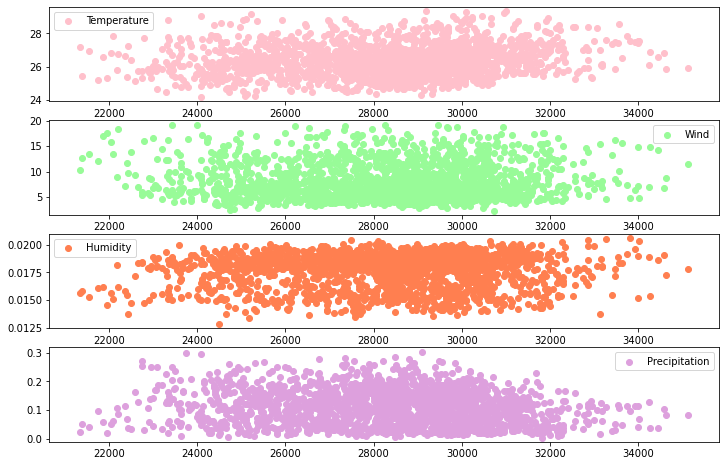

In [33]:
fig, ax = plt.subplots(figsize=(12,8))
plt.subplot(4,1,1)
plt.scatter(daily_data['nat_demand'], daily_data['avg_temp'],color='pink')
plt.legend(['Temperature'])

plt.subplot(4,1,2)
plt.scatter(daily_data['nat_demand'], daily_data['avg_wind'],color='palegreen')
plt.legend(['Wind'])

plt.subplot(4,1,3)
plt.scatter(daily_data['nat_demand'], daily_data['avg_humidity'],color="coral")
plt.legend(['Humidity'])

plt.subplot(4,1,4)
plt.scatter(daily_data['nat_demand'], daily_data['avg_prec'],color='plum')
plt.legend(['Precipitation'])


plt.show()

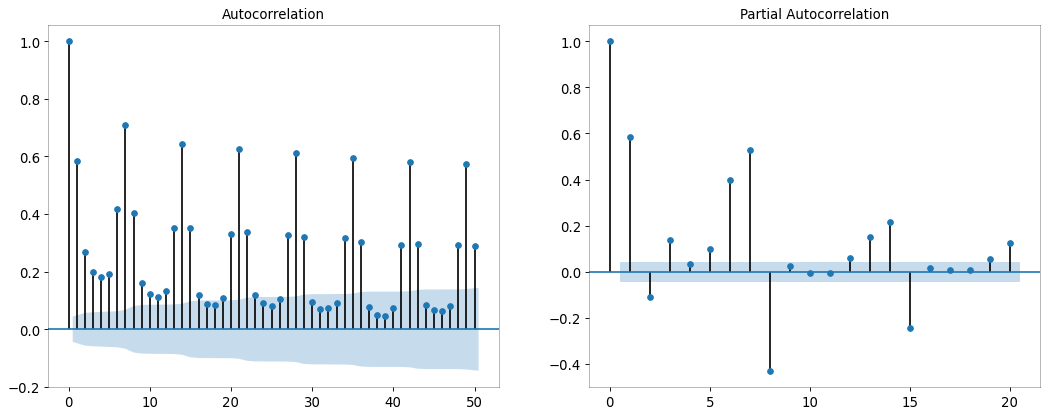

In [24]:
#Introducing a week lagged demand variable to account for increaseing and decreasing demand of electricty w.r.t time

#Checking correleation

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


df =daily_data["nat_demand"]


fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,6), dpi= 80)

plot_acf(df.tolist(), ax=ax1, lags=50)


plot_pacf(df.tolist(), ax=ax2, lags=20)



ax1.spines["top"].set_alpha(.3); ax2.spines["top"].set_alpha(.3)
ax1.spines["bottom"].set_alpha(.3); ax2.spines["bottom"].set_alpha(.3)
ax1.spines["right"].set_alpha(.3); ax2.spines["right"].set_alpha(.3)
ax1.spines["left"].set_alpha(.3); ax2.spines["left"].set_alpha(.3)


ax1.tick_params(axis='both', labelsize=12)
ax2.tick_params(axis='both', labelsize=12)

plt.show()

In [25]:
daily_data["lag_demand"] = daily_data["nat_demand"].shift(7)
daily_data.dropna(inplace = True)

In [26]:
daily_data["date"]= pd.to_datetime(daily_data["date"])

daily_data.set_index("date", inplace = True)


In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(daily_data.iloc[:,1:], daily_data.iloc[:,0],
                                                    test_size=0.20, random_state=42)

### CHECKING FOR MULTICOLLINEARITY

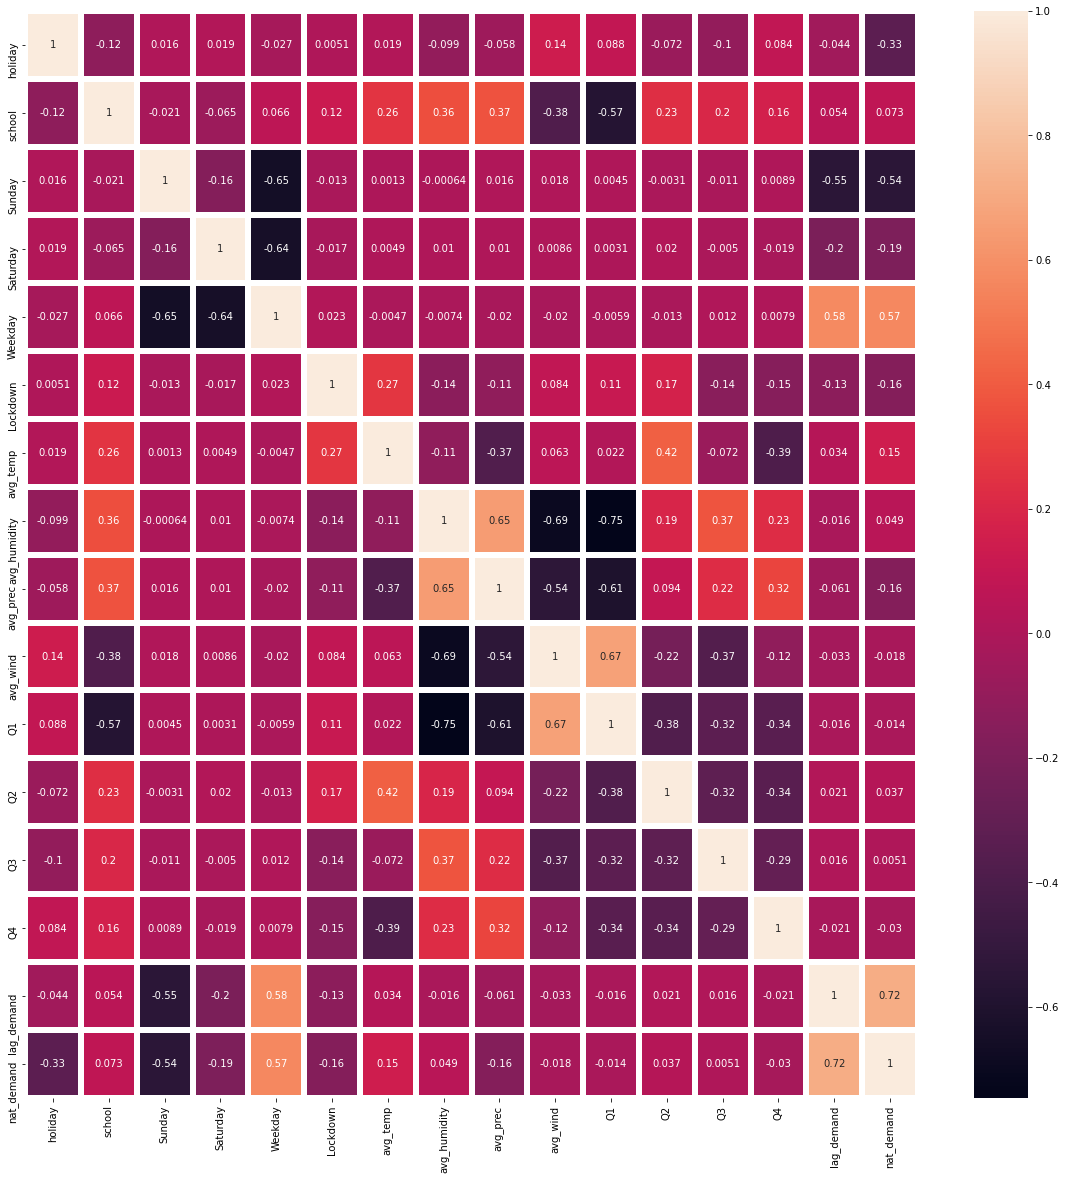

In [29]:
f,ax = plt.subplots(figsize =(20,20))
corr_df = pd.concat([X_train,y_train],axis=1)
sns.heatmap(corr_df.corr(method='pearson'), annot=True, lw =5)

In [30]:
#Checking VIF: Variance Inflation factor

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i)
                          for i in range(len(X_train.columns))]
  
print(vif_data)


         feature       VIF
0        holiday  1.054455
1         school  1.970713
2         Sunday       inf
3       Saturday       inf
4        Weekday       inf
5       Lockdown  1.194475
6       avg_temp  2.023606
7   avg_humidity  3.185091
8       avg_prec  2.522220
9       avg_wind  2.263934
10            Q1       inf
11            Q2       inf
12            Q3       inf
13            Q4       inf
14    lag_demand  1.713101


C:\Users\ACER\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [31]:
X_train.to_csv("X_train.csv", index = False)
X_test.to_csv("X_test.csv", index = False)
y_train.to_csv("y_train.csv", index = False)
y_test.to_csv("y_test.csv", index = False)
daily_data.to_csv("daily_data.csv", index = True)